In [41]:
import pandas as pd

train = pd.read_csv('CMAPSSData/train_FD001.txt', delim_whitespace=True)
train.columns = ['unit_nr', 'time_cycles','setting_1', 'setting_2', 'setting_3'] + ['s_{}'.format(i) for i in range(1,22)] 

test = pd.read_csv('CMAPSSData/test_FD001.txt', delim_whitespace=True)
test.columns = ['unit_nr', 'time_cycles','setting_1', 'setting_2', 'setting_3'] + ['s_{}'.format(i) for i in range(1,22)] 

y_test = pd.read_csv('CMAPSSData/RUL_FD001.txt', delim_whitespace=True)
y_test.columns = ['RUL']


/var/folders/tr/w0mg2b9x51gddgrn9_c7yr_r0000gn/T/ipykernel_77874/3505902327.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_csv('CMAPSSData/train_FD001.txt', delim_whitespace=True)
/var/folders/tr/w0mg2b9x51gddgrn9_c7yr_r0000gn/T/ipykernel_77874/3505902327.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv('CMAPSSData/test_FD001.txt', delim_whitespace=True)
/var/folders/tr/w0mg2b9x51gddgrn9_c7yr_r0000gn/T/ipykernel_77874/3505902327.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv('CMAPSSData/RUL_FD001.txt', delim_whitespace=True)


In [42]:
print(train.info())
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20630 entries, 0 to 20629
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_nr      20630 non-null  int64  
 1   time_cycles  20630 non-null  int64  
 2   setting_1    20630 non-null  float64
 3   setting_2    20630 non-null  float64
 4   setting_3    20630 non-null  float64
 5   s_1          20630 non-null  float64
 6   s_2          20630 non-null  float64
 7   s_3          20630 non-null  float64
 8   s_4          20630 non-null  float64
 9   s_5          20630 non-null  float64
 10  s_6          20630 non-null  float64
 11  s_7          20630 non-null  float64
 12  s_8          20630 non-null  float64
 13  s_9          20630 non-null  float64
 14  s_10         20630 non-null  float64
 15  s_11         20630 non-null  float64
 16  s_12         20630 non-null  float64
 17  s_13         20630 non-null  float64
 18  s_14         20630 non-null  float64
 19  s_15

In [43]:
print(test.head())

   unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            2    -0.0027    -0.0003      100.0  518.67  641.71   
1        1            3     0.0003     0.0001      100.0  518.67  642.46   
2        1            4     0.0042     0.0000      100.0  518.67  642.44   
3        1            5     0.0014     0.0000      100.0  518.67  642.51   
4        1            6     0.0012     0.0003      100.0  518.67  642.11   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1588.45  1395.42  14.62  ...  522.16  2388.06  8139.62  8.3803  0.03   393   
1  1586.94  1401.34  14.62  ...  521.97  2388.03  8130.10  8.4441  0.03   393   
2  1584.12  1406.42  14.62  ...  521.38  2388.05  8132.90  8.3917  0.03   391   
3  1587.19  1401.92  14.62  ...  522.15  2388.03  8129.54  8.4031  0.03   390   
4  1579.12  1395.13  14.62  ...  521.92  2388.08  8127.46  8.4238  0.03   392   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.02  

In [44]:
print(y_test.head())

   RUL
0   98
1   69
2   82
3   91
4   93


In [45]:
print(train.head())

   unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            2     0.0019    -0.0003      100.0  518.67  642.15   
1        1            3    -0.0043     0.0003      100.0  518.67  642.35   
2        1            4     0.0007     0.0000      100.0  518.67  642.35   
3        1            5    -0.0019    -0.0002      100.0  518.67  642.37   
4        1            6    -0.0043    -0.0001      100.0  518.67  642.10   

       s_3      s_4    s_5  ...    s_12     s_13     s_14    s_15  s_16  s_17  \
0  1591.82  1403.14  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03   392   
1  1587.99  1404.20  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03   390   
2  1582.79  1401.87  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03   392   
3  1582.85  1406.22  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03   393   
4  1584.47  1398.37  14.62  ...  521.68  2388.03  8132.85  8.4108  0.03   391   

   s_18   s_19   s_20     s_21  
0  2388  100.0  39.00  

In [46]:
#remaining useful life
train['RUL'] = train.groupby('unit_nr')['time_cycles'].transform(lambda x: x.max() - x)
print(train['RUL'])

0        190
1        189
2        188
3        187
4        186
        ... 
20625      4
20626      3
20627      2
20628      1
20629      0
Name: RUL, Length: 20630, dtype: int64


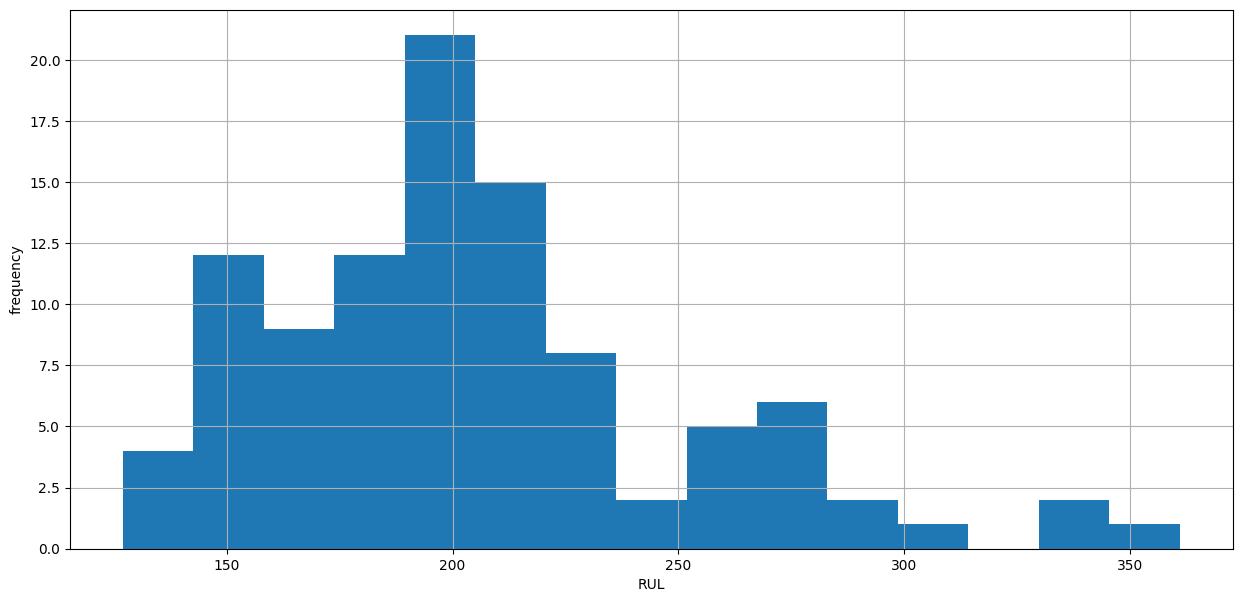

In [47]:
import matplotlib.pyplot as plt 

df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [48]:
"""window_size = 5
for sensor in ['s_1', 's_2']:
    train[f'{sensor}_rolling_mean'] = train[sensor].rolling(window=window_size).mean()
    train[f'{sensor}_rolling_std'] = train[sensor].rolling(window=window_size).std()

# Display the first few rows of the modified DataFrame
print(train.head())
"""

"window_size = 5\nfor sensor in ['s_1', 's_2']:\n    train[f'{sensor}_rolling_mean'] = train[sensor].rolling(window=window_size).mean()\n    train[f'{sensor}_rolling_std'] = train[sensor].rolling(window=window_size).std()\n\n# Display the first few rows of the modified DataFrame\nprint(train.head())\n"

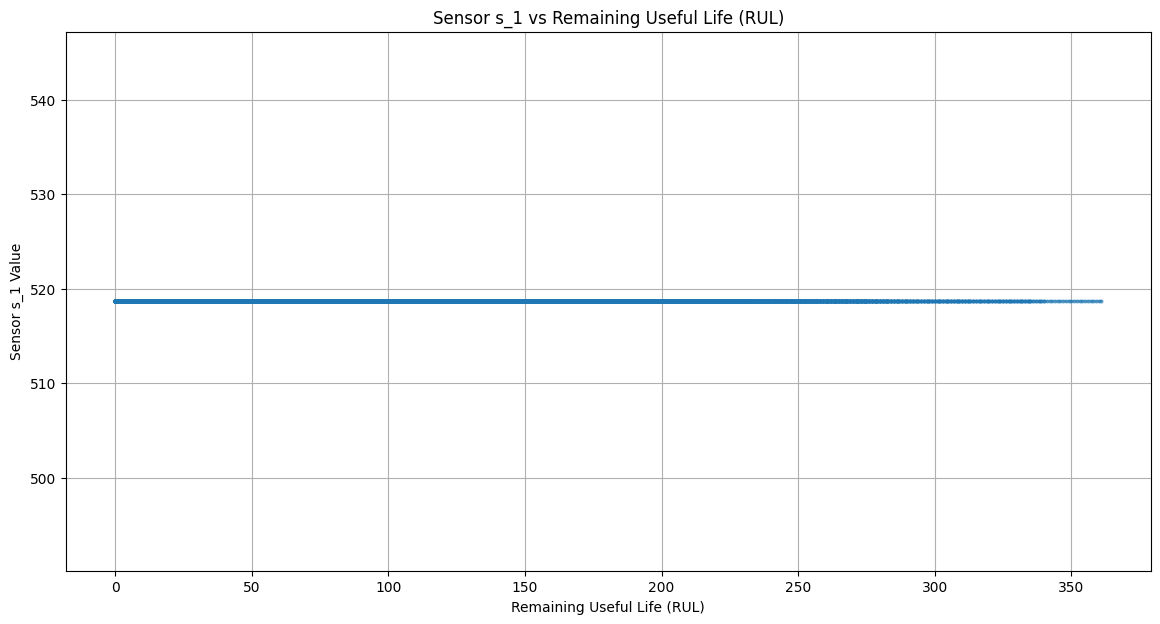

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(train['RUL'], train['s_1'], marker='o', linestyle='-', alpha=0.5, markersize=2)
plt.title('Sensor s_1 vs Remaining Useful Life (RUL)')
plt.xlabel('Remaining Useful Life (RUL)')
plt.ylabel('Sensor s_1 Value')
plt.grid()
plt.show()

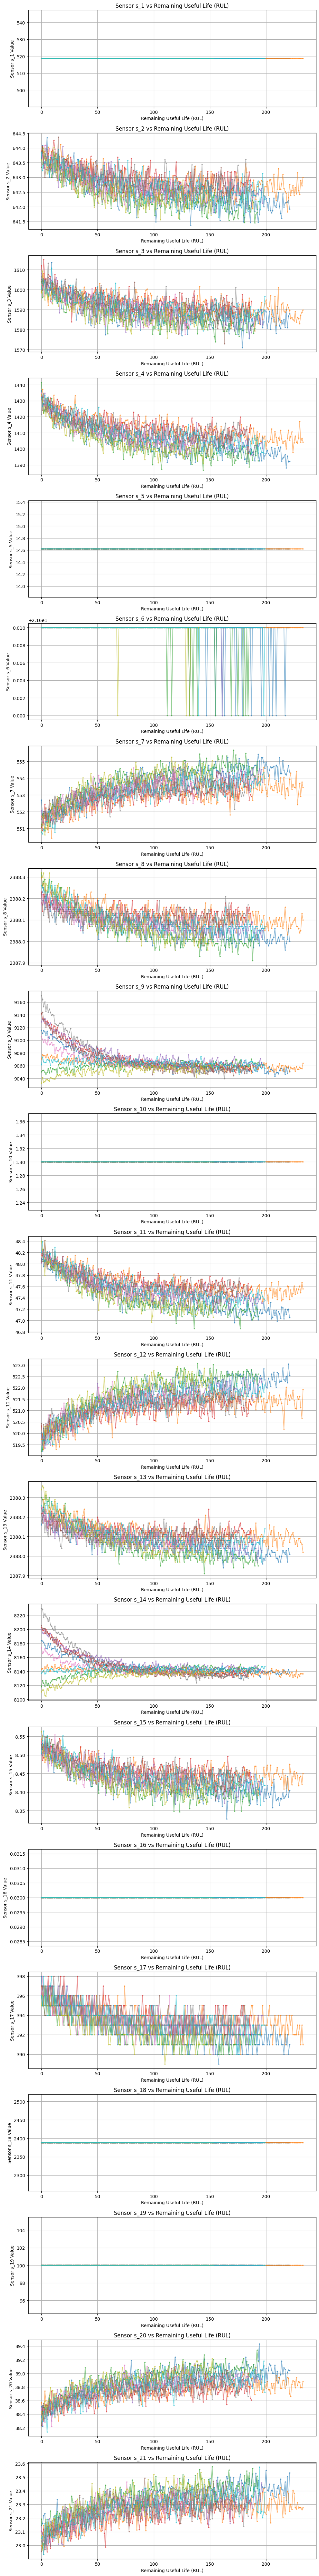

In [50]:
sensor_columns = [col for col in train.columns if col.startswith('s_')]

# Create plots for each sensor
plt.figure(figsize=(10, 80))

for i, sensor in enumerate(sensor_columns):
    plt.subplot(len(sensor_columns), 1, i + 1)  # Create a subplot for each sensor
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            i_data = train[train['unit_nr'] == i]
            plt.plot(i_data['RUL'], i_data[sensor], marker='o', linestyle='-', alpha=0.5, markersize=2)
    plt.title(f'Sensor {sensor} vs Remaining Useful Life (RUL)')
    plt.xlabel('Remaining Useful Life (RUL)')
    plt.ylabel(f'Sensor {sensor} Value')
    plt.grid()

plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()

In [56]:
drop_sensors = ['s_1','s_5','s_6','s_10','s_16','s_18','s_19','unit_nr','time_cycles','setting_1', 'setting_2', 'setting_3']

X_train = train.drop(drop_sensors, axis=1)
X_test = test.drop(drop_sensors, axis=1)
y_train = X_train.pop('RUL')

X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

print(X_train)
print(y_train)

          s_2      s_3      s_4     s_7      s_8      s_9   s_11    s_12  \
0      642.15  1591.82  1403.14  553.75  2388.04  9044.07  47.49  522.28   
1      642.35  1587.99  1404.20  554.26  2388.08  9052.94  47.27  522.42   
2      642.35  1582.79  1401.87  554.45  2388.11  9049.48  47.13  522.86   
3      642.37  1582.85  1406.22  554.00  2388.06  9055.15  47.28  522.19   
4      642.10  1584.47  1398.37  554.67  2388.02  9049.68  47.16  521.68   
...       ...      ...      ...     ...      ...      ...    ...     ...   
20625  643.49  1597.98  1428.63  551.43  2388.19  9065.52  48.07  519.49   
20626  643.54  1604.50  1433.58  550.86  2388.23  9065.11  48.04  519.68   
20627  643.42  1602.46  1428.18  550.94  2388.24  9065.90  48.09  520.01   
20628  643.23  1605.26  1426.53  550.68  2388.25  9073.72  48.39  519.67   
20629  643.85  1600.38  1432.14  550.79  2388.26  9061.48  48.20  519.30   

          s_13     s_14    s_15  s_17   s_20     s_21  
0      2388.07  8131.49  8.4318

In [57]:
#X_test = test.groupby('unit_nr').last().reset_index().drop(drop_sensors, axis=1)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [59]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# predict and evaluate
y_hat_train = lm.predict(X_train)
evaluate(y_train, y_hat_train, 'train')

y_hat_test = lm.predict(X_test)
evaluate(y_test, y_hat_test)

train set RMSE:44.66865228363294, R2:0.5794306239028353


ValueError: Found input variables with inconsistent numbers of samples: [99, 13095]

In [62]:
X_test = test.groupby('unit_nr').last().reset_index().drop(drop_sensors, axis=1)
print(len(y_test), len(X_test), len(y_hat_test))

99 100 13095


In [64]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   RUL     99 non-null     int64
dtypes: int64(1)
memory usage: 920.0 bytes
